<a href="https://colab.research.google.com/github/va22abb/Msc-Data-Project-Comparative-study-of-machine-learning-algorithms-in-predicting-cervical-cancer/blob/cerevical-cancer-modelling/Cervical_Cancer_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing The Required Libraries**

In [ ]:
# Import the Necessary Libraries import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive


# **Mounting My Drive**

In [ ]:
# Mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading The Dataset**

In [ ]:
# Loading the datasets
df = pd.read_csv('/content/drive/MyDrive/My Project/cervical_cancer_risk_factors_dataset.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# **Cleaning The Dataset**

In [ ]:
# Replacing '?' with None
df.replace('?', None, inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
2,34,1.0,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,None,None,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,None,None,0,0,0,0,0,0,0,0


In [ ]:
# The necessary information of my data and statisics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [ ]:
# Converting object columns to float in my data
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# The necessary information of my data and statisics after covertion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

# **The Exploratory Data Analysis (EDA)**

In [ ]:
# locating columns with missing values
def missing_values_table(df):
        # Total missing values in each column
        mis_val = df.isnull().sum()

        #  Calculating the percentage of missing values in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Making a table with the output
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renaming the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sorting columns by highest percentage of missing data
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Printing a summary of missing data information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Returning the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 36 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD,117,13.6
IUD (years),117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:vulvo-perineal condylomatosis,105,12.2
STDs:HPV,105,12.2
STDs:Hepatitis B,105,12.2
STDs:HIV,105,12.2


In [ ]:
# Dropping the two columns with excesive missing values
df.drop('STDs: Time since first diagnosis', inplace=True, axis=1)
df.drop('STDs: Time since last diagnosis', inplace=True, axis=1)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
# using the drop_duplicates method to remove duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [ ]:
# filling the missing data in the dataset with the mean values for each of the columns.
data = df.fillna(df.mean())
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
data_missing= missing_values_table(data)
data_missing

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# using the describe method to check the statistical summary of the dataset
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,0.002721,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.651365,2.805153,1.406092,0.354138,4.108329,2.238619,0.446366,3.552168,0.296809,...,0.048904,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


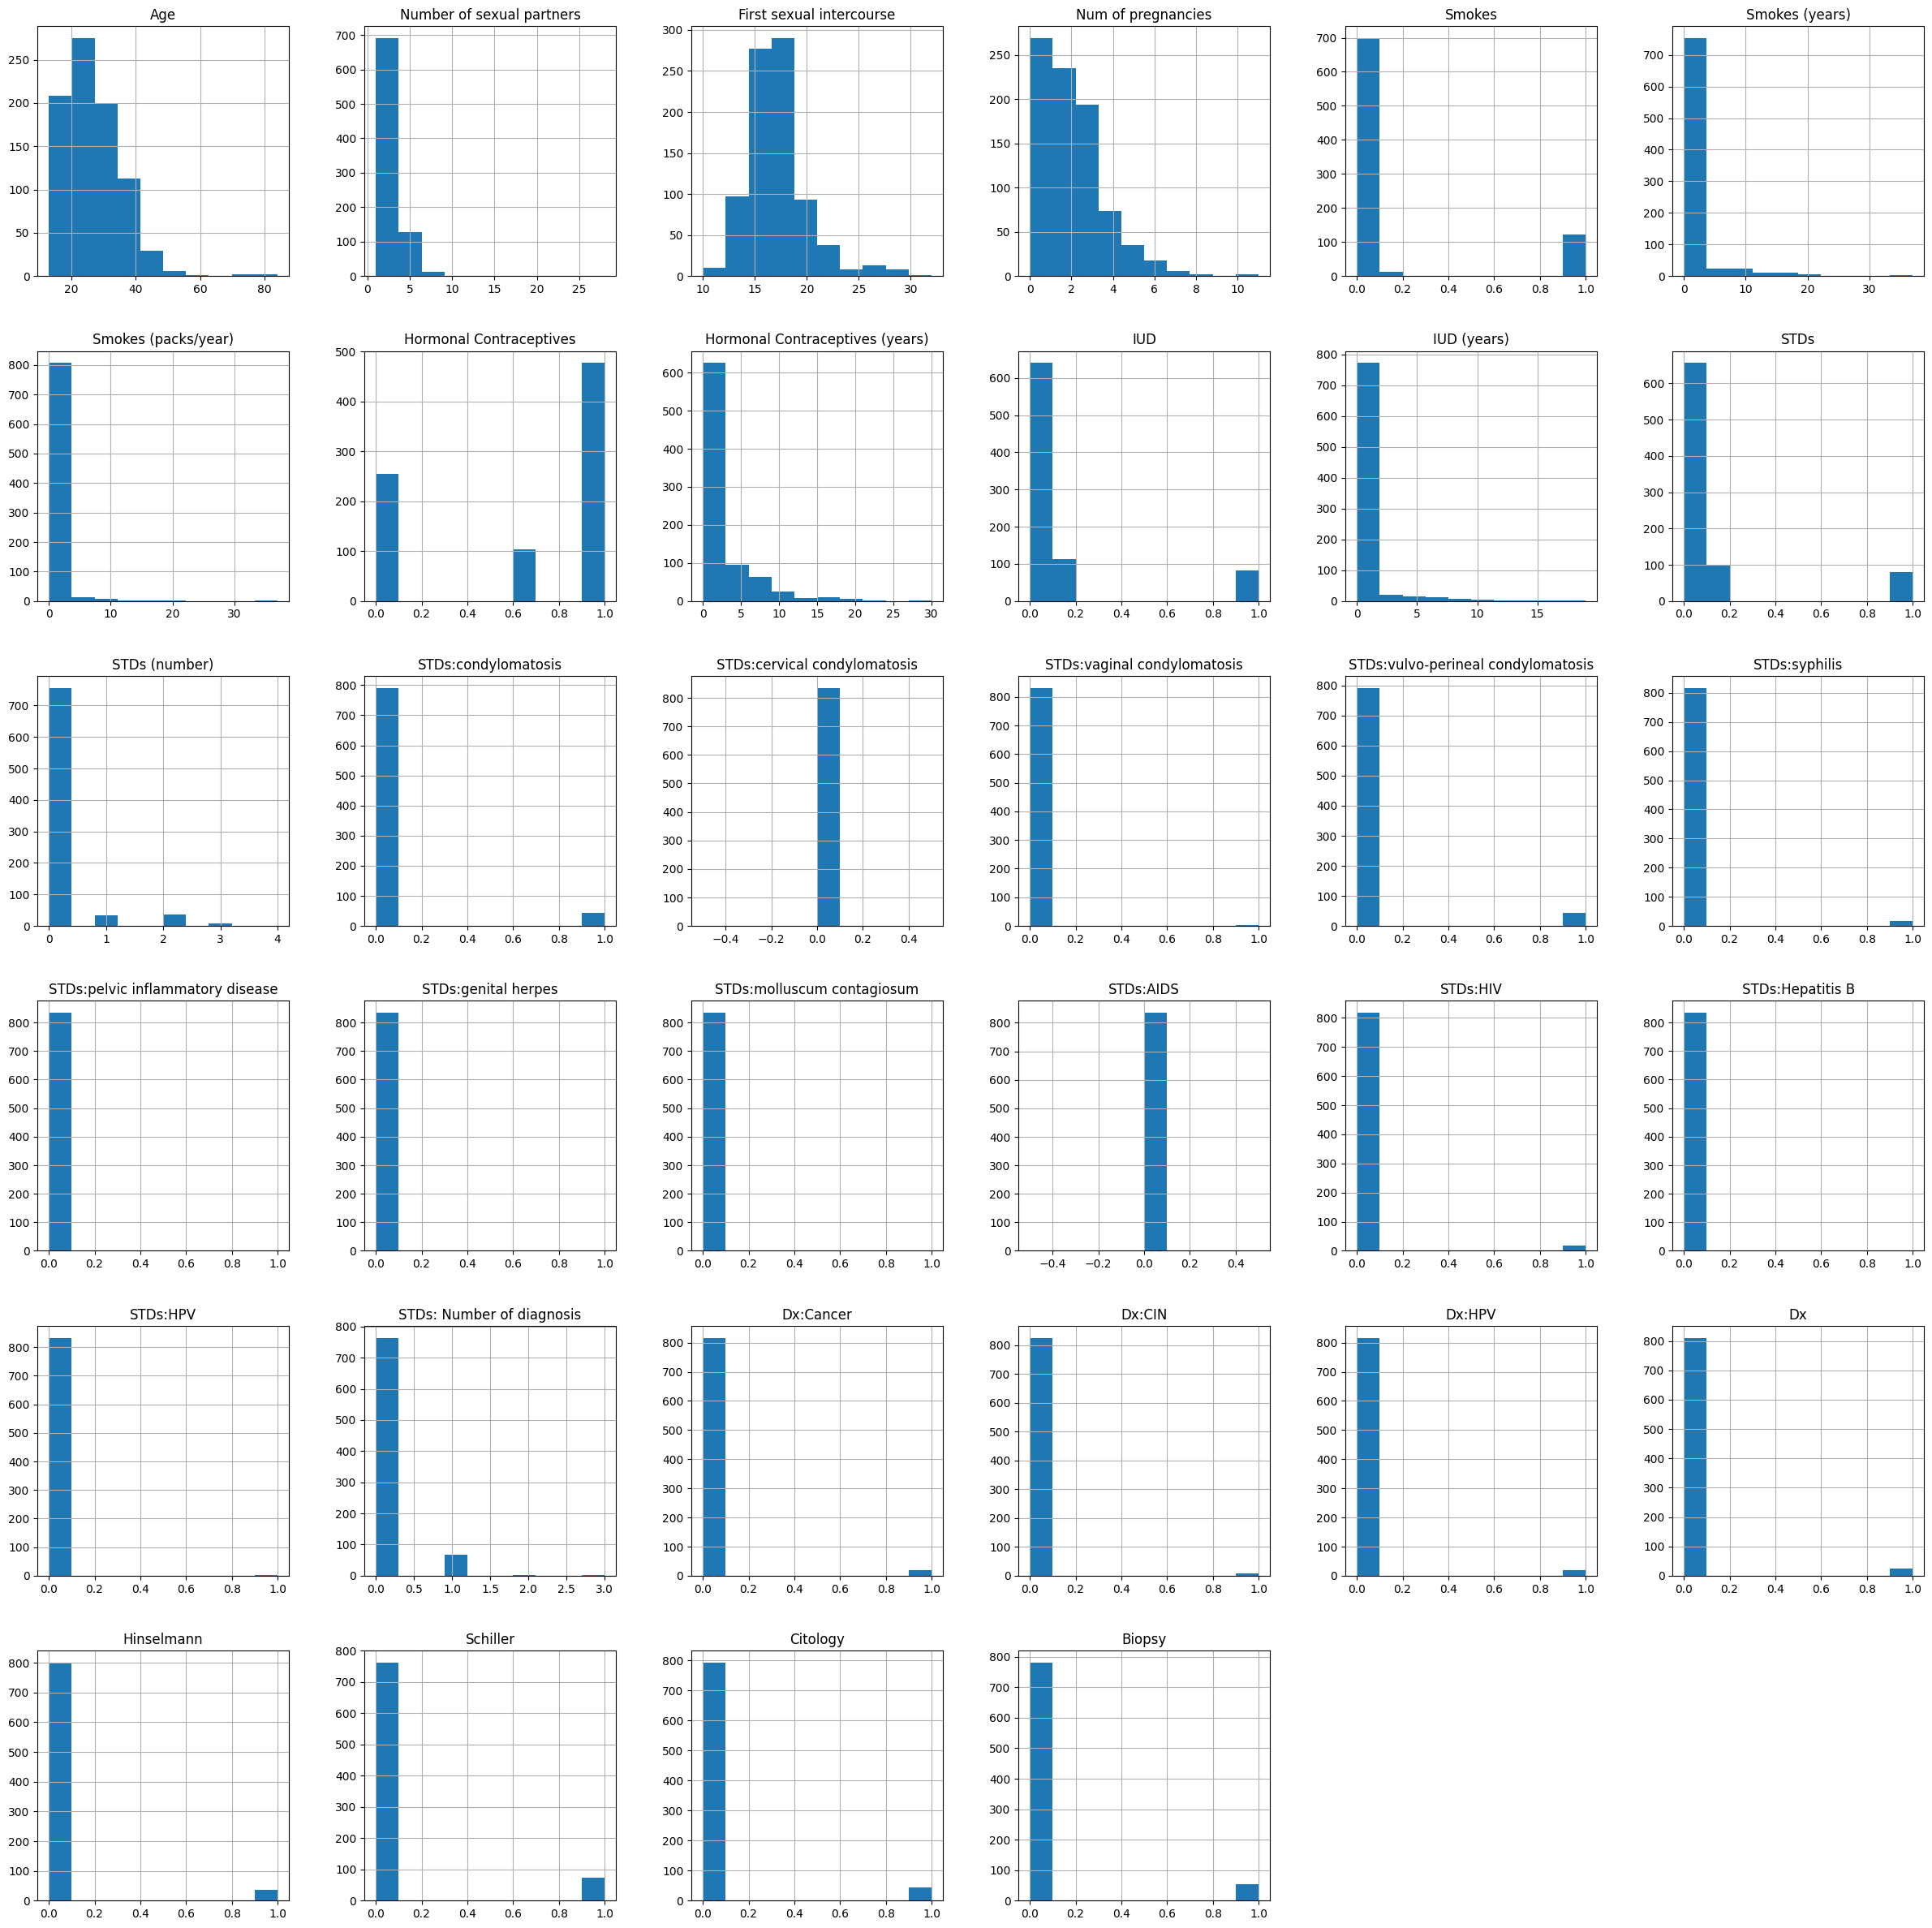

In [ ]:
# plotting variation graphs for each property
data.hist(figsize=(30, 30))
plt.show()


In [20]:
# Checking the correlation among the dataset
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070393,0.360942,0.516255,0.046625,0.213631,0.128271,0.039047,0.267937,0.264234,...,0.037987,-0.008673,0.108519,0.059899,0.099765,0.089979,-0.009050,0.101150,-0.019194,0.054396
Number of sexual partners,0.070393,1.000000,-0.155194,0.066302,0.234549,0.174446,0.173685,-0.009221,0.010643,0.025579,...,0.013303,0.047791,0.020319,0.014289,0.025316,0.020654,-0.042595,-0.017298,0.014021,-0.009584
First sexual intercourse,0.360942,-0.155194,1.000000,-0.070213,-0.128780,-0.061682,-0.058716,0.003008,0.001125,-0.024437,...,0.032938,-0.016102,0.066566,-0.033861,0.043034,0.034535,-0.018585,0.003783,-0.009438,0.008496
Num of pregnancies,0.516255,0.066302,-0.070213,1.000000,0.073625,0.170801,0.094033,0.125954,0.199409,0.194578,...,-0.029361,0.028102,0.032414,0.006463,0.044150,0.016422,0.035146,0.087259,-0.029993,0.044011
Smokes,0.046625,0.234549,-0.128780,0.073625,1.000000,0.722303,0.492470,-0.010657,0.039673,-0.054692,...,0.048794,0.092576,-0.012670,-0.044132,0.010629,-0.069700,0.032292,0.052422,-0.004358,0.028471
Smokes (years),0.213631,0.174446,-0.061682,0.170801,0.722303,1.000000,0.723737,-0.017558,0.045585,0.025168,...,0.050636,0.079563,0.053593,-0.031877,0.056138,-0.050345,0.069674,0.094223,-0.007120,0.061448
Smokes (packs/year),0.128271,0.173685,-0.058716,0.094033,0.492470,0.723737,1.000000,0.001623,0.037833,0.006215,...,-0.008668,0.030668,0.107777,-0.021734,0.109668,-0.034325,0.025542,0.017251,0.004477,0.024430
Hormonal Contraceptives,0.039047,-0.009221,0.003008,0.125954,-0.010657,-0.017558,0.001623,1.000000,0.444087,0.026560,...,0.038642,-0.058004,0.023485,-0.005541,0.035531,-0.005400,0.029373,-0.005414,-0.008712,0.008858
Hormonal Contraceptives (years),0.267937,0.010643,0.001125,0.199409,0.039673,0.045585,0.037833,0.444087,1.000000,0.091109,...,0.051646,-0.041006,0.052932,0.001884,0.059837,-0.014990,0.036274,0.078274,0.076046,0.079738
IUD,0.264234,0.025579,-0.024437,0.194578,-0.054692,0.025168,0.006215,0.026560,0.091109,1.000000,...,-0.019070,0.027415,0.109352,0.051267,0.056945,0.137831,0.042244,0.083607,0.007454,0.051631


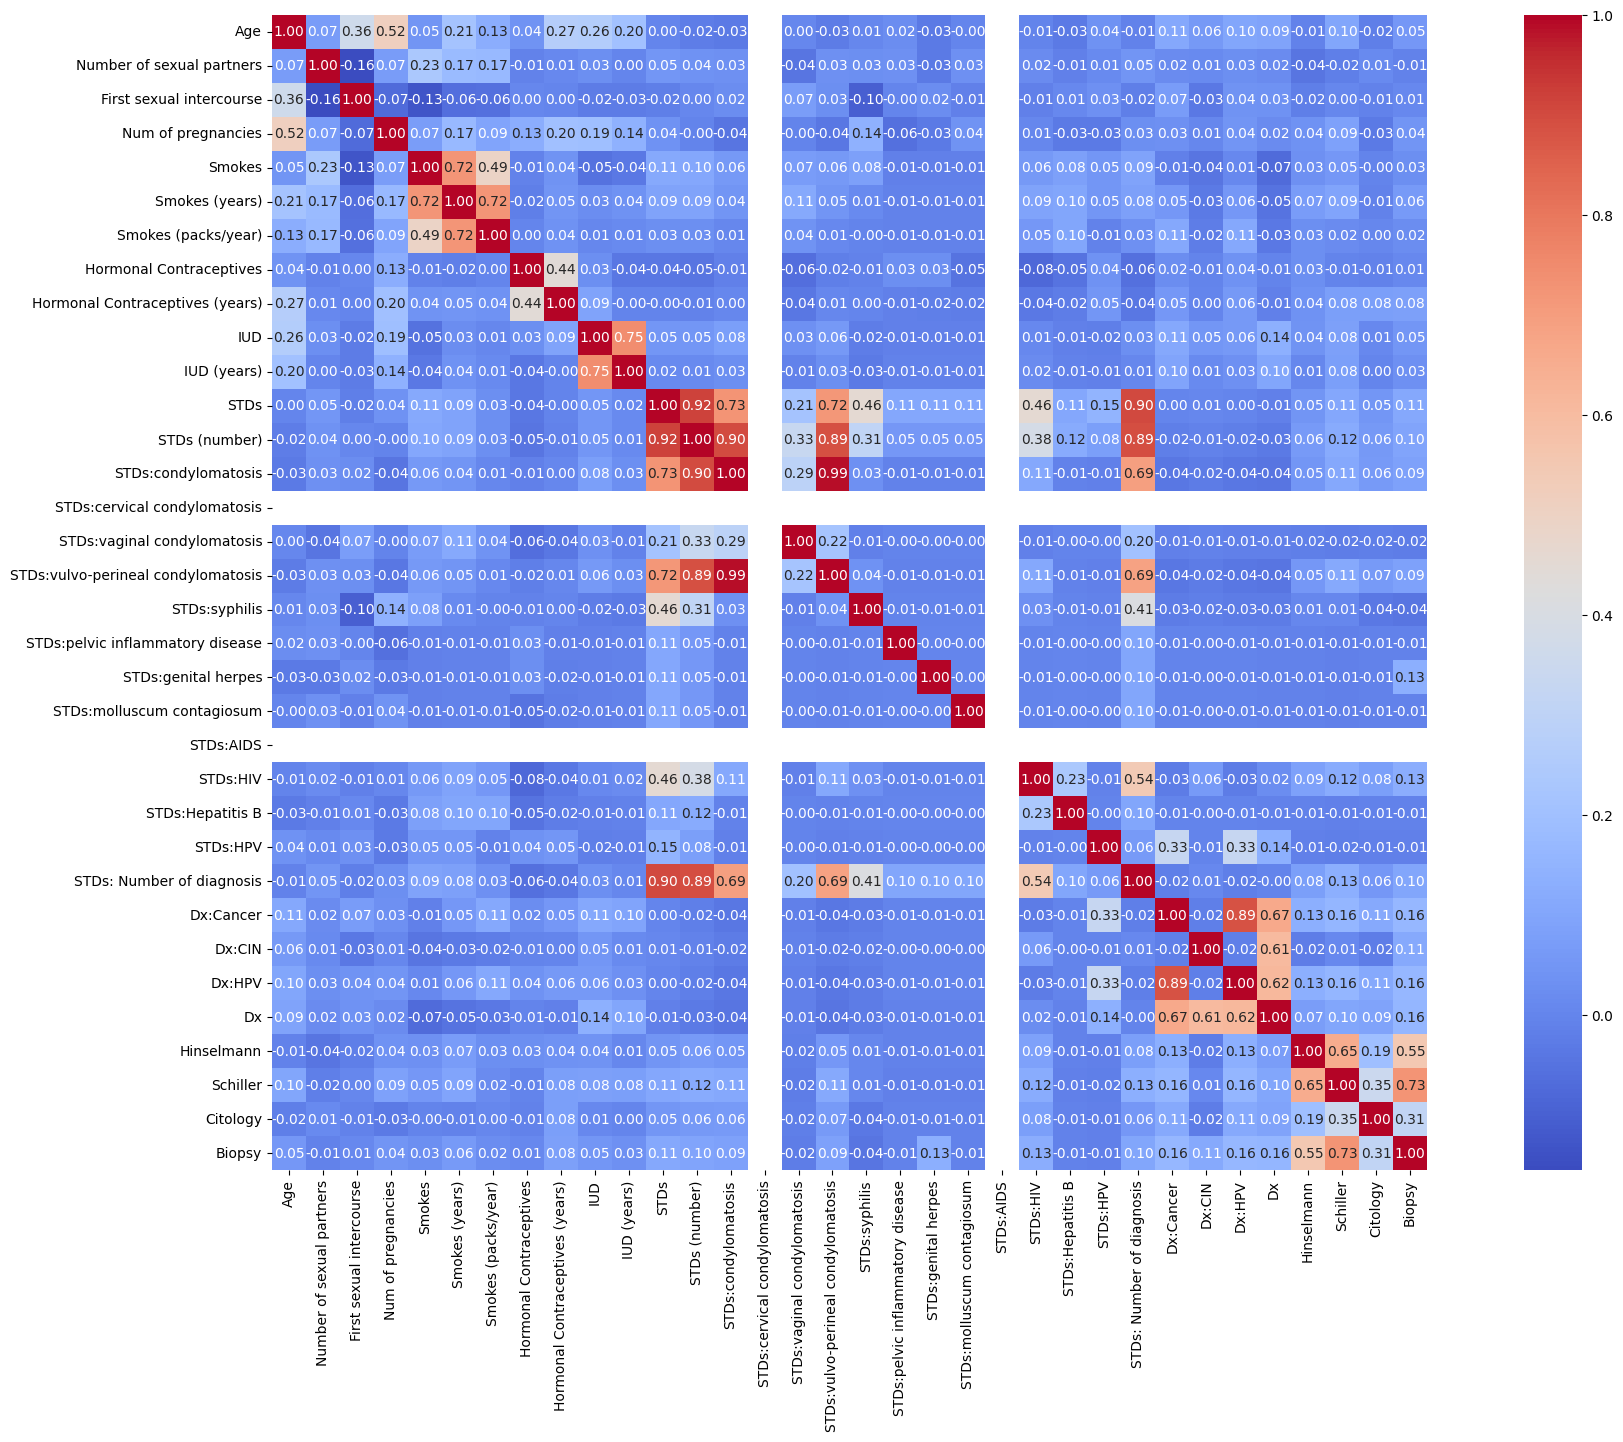

In [21]:
# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap with a specified figure size
plt.figure(figsize=(25, 15))  # Adjustng the figure size as desires
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()
